# Import Libraries

In [1]:
pip install --upgrade mxnet-cu100

Requirement already up-to-date: mxnet-cu100 in /usr/local/lib/python3.6/dist-packages (1.5.1.post0)


In [2]:
pip install autogluon

In [3]:
import autogluon as ag
from autogluon import ImageClassification as task

# Create AutoGluon Dataset

In [4]:
 !unzip shop.zip

Archive:  shop.zip
   creating: data/
   creating: data/test/
   creating: data/test/womenchiffontop/
  inflating: data/test/womenchiffontop/womenchiffontop_889.jpg  
  inflating: data/test/womenchiffontop/womenchiffontop_3126.jpg  
  inflating: data/test/womenchiffontop/womenchiffontop_703.jpg  
  inflating: data/test/womenchiffontop/womenchiffontop_862.jpg  
  inflating: data/test/womenchiffontop/womenchiffontop_184.jpg  
  inflating: data/test/womenchiffontop/womenchiffontop_2132.jpg  
  inflating: data/test/womenchiffontop/womenchiffontop_2496.jpg  
  inflating: data/test/womenchiffontop/womenchiffontop_1121.jpg  
  inflating: data/test/womenchiffontop/womenchiffontop_1267.jpg  
  inflating: data/test/womenchiffontop/womenchiffontop_1669.jpg  
  inflating: data/test/womenchiffontop/womenchiffontop_878.jpg  
  inflating: data/test/womenchiffontop/womenchiffontop_2334.jpg  
  inflating: data/test/womenchiffontop/womenchiffontop_2063.jpg  
  inflating: data/test/womenchiffontop/womenc

In [5]:
dataset = task.Dataset('data/train')

In [6]:
test_dataset = task.Dataset('data/test', train=False)

In [7]:
if ag.get_gpu_count() == 0:
    dataset = task.Dataset(name='FashionMNIST')
    test_dataset = task.Dataset(name='FashionMNIST', train=False)

# Use AutoGluon to Fit Models

scheduler_options: Key 'training_history_callback_delta_secs': Imputing default value 60
scheduler_options: Key 'delay_get_config': Imputing default value True

Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2


scheduler: FIFOScheduler(
DistributedResourceManager{
(Remote: Remote REMOTE_ID: 0, 
	<Remote: 'inproc://172.28.0.2/292/1' processes=1 threads=2, memory=13.65 GB>, Resource: NodeResourceManager(2 CPUs, 1 GPUs))
})



Model file not found. Downloading.


100%|██████████| 55344/55344 [00:02<00:00, 25333.13KB/s]


Saving Training Curve in checkpoint/plot_training_curves.png


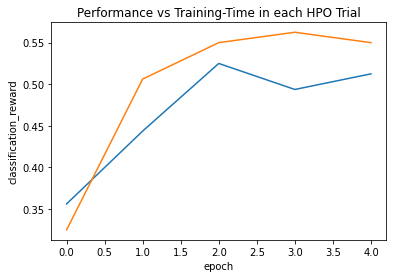

In [8]:
classifier = task.fit(dataset,
                      epochs=5,
                      ngpus_per_trial=1,
                      verbose=False)

In [9]:
print('Top-1 val acc: %.3f' % classifier.results['best_reward'])

Top-1 val acc: 0.550


# Predict on a New Image

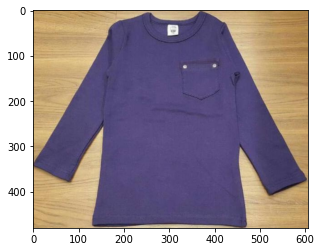

The input picture is classified as [BabyShirt], with probability 0.54.


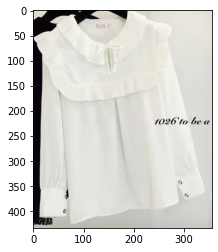

The input picture is classified as [womenchiffontop], with probability 0.35.


In [10]:
# skip this if training FashionMNIST on CPU.
if ag.get_gpu_count() > 0:
    image = 'data/test/BabyShirt/BabyShirt_323.jpg'
    ind, prob, _ = classifier.predict(image, plot=True)

    print('The input picture is classified as [%s], with probability %.2f.' %
          (dataset.init().classes[ind.asscalar()], prob.asscalar()))

    image = 'data/test/womenchiffontop/womenchiffontop_184.jpg'
    ind, prob, _ = classifier.predict(image, plot=True)

    print('The input picture is classified as [%s], with probability %.2f.' %
          (dataset.init().classes[ind.asscalar()], prob.asscalar()))

# Evaluate on Test Datase

In [11]:
test_acc = classifier.evaluate(test_dataset)
print('Top-1 test acc: %.3f' % test_acc)


Top-1 test acc: 0.766
